In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import statsmodels.api as sm
import yfinance as yf
import datetime
from scipy import stats

In [ ]:
xom_data = yf.download('XOM', start='2000-01-01', end='2023-01-01', interval='1mo')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
spy_data = yf.download('SPY', start='2000-01-01', end='2023-01-01', interval='1mo')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
xom_data['Monthly Return'] = xom_data['Adj Close'].pct_change()
spy_data['Monthly Return'] = spy_data['Adj Close'].pct_change()

In [ ]:
xom_data = xom_data.dropna(subset=['Monthly Return'])
spy_data = spy_data.dropna(subset=['Monthly Return'])


In [ ]:
# Align Exxon Mobil and S&P 500 data to ensure they have matching dates
aligned_xom, aligned_spy = xom_data.align(spy_data, join='inner', axis=0)

aligned_xom, aligned_spy

(                  Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2000-02-01   41.656250   42.437500   34.937500   37.656250   17.626556   
 2000-03-01   37.687500   41.000000   36.000000   39.000000   18.357887   
 2000-04-01   38.875000   41.562500   37.500000   38.843750   18.284328   
 2000-05-01   39.156250   41.968750   38.500000   41.656250   19.608221   
 2000-06-01   41.781250   42.375000   38.843750   39.250000   18.575857   
 ...                ...         ...         ...         ...         ...   
 2022-08-01   94.790001  101.559998   86.279999   95.589996   89.977341   
 2022-09-01   94.419998   99.190002   83.889999   87.309998   82.982033   
 2022-10-01   90.040001  112.910004   89.720001  110.809998  105.317131   
 2022-11-01  112.370003  114.660004  107.480003  111.339996  105.820854   
 2022-12-01  111.639999  112.070000  102.370003  110.300003  105.676346   
 
                Volume 

In [ ]:
# Now both datasets will have the same dates, let's ensure we only work with those dates
common_dates = aligned_xom.index.intersection(aligned_spy.index)
common_dates

DatetimeIndex(['2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
               '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01',
               '2000-10-01', '2000-11-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', name='Date', length=275, freq=None)

In [ ]:
data_xom_aligned = aligned_xom.loc[common_dates]
data_xom_aligned

,Open,High,Low,Close,Adj Close,Volume,Monthly Return
Date,,,,,,,
2000-02-01,41.656250,42.437500,34.937500,37.656250,17.626556,221046200,-0.091252
2000-03-01,37.687500,41.000000,36.000000,39.000000,18.357887,279745400,0.041490
2000-04-01,38.875000,41.562500,37.500000,38.843750,18.284328,201420000,-0.004007
2000-05-01,39.156250,41.968750,38.500000,41.656250,19.608221,193631800,0.072406
2000-06-01,41.781250,42.375000,38.843750,39.250000,18.575857,235361600,-0.052650
...,...,...,...,...,...,...,...
2022-08-01,94.790001,101.559998,86.279999,95.589996,89.977341,424555300,-0.013824
2022-09-01,94.419998,99.190002,83.889999,87.309998,82.982033,411406700,-0.077745
2022-10-01,90.040001,112.910004,89.720001,110.809998,105.317131,431618500,0.269156


In [ ]:
data_spy_aligned = aligned_spy.loc[common_dates]
data_spy_aligned

,Open,High,Low,Close,Adj Close,Volume,Monthly Return
Date,,,,,,,
2000-02-01,139.750000,144.562500,132.718750,137.437500,88.442993,186938300,-0.015226
2000-03-01,137.625000,155.750000,135.031250,150.375000,96.768456,247594900,0.094134
2000-04-01,150.125000,153.109375,133.500000,145.093750,93.607201,229246200,-0.032668
2000-05-01,146.562500,148.484375,136.500000,142.812500,92.135490,161024000,-0.015722
2000-06-01,143.687500,149.156250,143.000000,145.281250,93.728195,127146000,0.017287
...,...,...,...,...,...,...,...
2022-08-01,409.149994,431.730011,395.040009,395.179993,384.703888,1443394400,-0.040802
2022-09-01,392.890015,411.730011,357.040009,357.179993,347.711273,1998908600,-0.096159
2022-10-01,361.079987,389.519989,348.109985,386.209991,377.516113,2024732000,0.085717


In [ ]:
rolling_beta = pd.DataFrame(index=xom_data.index)
rolling_beta

""
Date
2000-02-01
2000-03-01
2000-04-01
2000-05-01
2000-06-01
...
2022-08-01
2022-09-01
2022-10-01


In [ ]:
# Initialize a DataFrame to store the rolling beta values, using the aligned Exxon Mobil data
beta_rolling = pd.DataFrame(index=data_xom_aligned.index)

# Define the period for the rolling calculation
rolling_lookback = 36  # months

# Iterate through the dates to calculate rolling beta
for date in beta_rolling.index:
    start_period = date - pd.DateOffset(months=rolling_lookback-1)
    end_period = date

    returns_xom = data_xom_aligned.loc[start_period:end_period, 'Monthly Return']
    returns_spy = data_spy_aligned.loc[start_period:end_period, 'Monthly Return']

    cov = returns_xom.cov(returns_spy)
    var = returns_spy.var()

    beta_value = cov / var

    beta_rolling.loc[date, 'Beta 3-Year Rolling'] = beta_value

# Clean up any missing values that might have arisen during the calculation
beta_rolling = beta_rolling.dropna()


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1609: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.cov(a, b, ddof=ddof)[0, 1]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [ ]:
beta_rolling

,Beta 3-Year Rolling
Date,
2000-03-01,1.213808
2000-04-01,0.662047
2000-05-01,0.407428
2000-06-01,0.361262
2000-07-01,0.295804
...,...
2022-08-01,0.949437
2022-09-01,0.944938
2022-10-01,1.059330


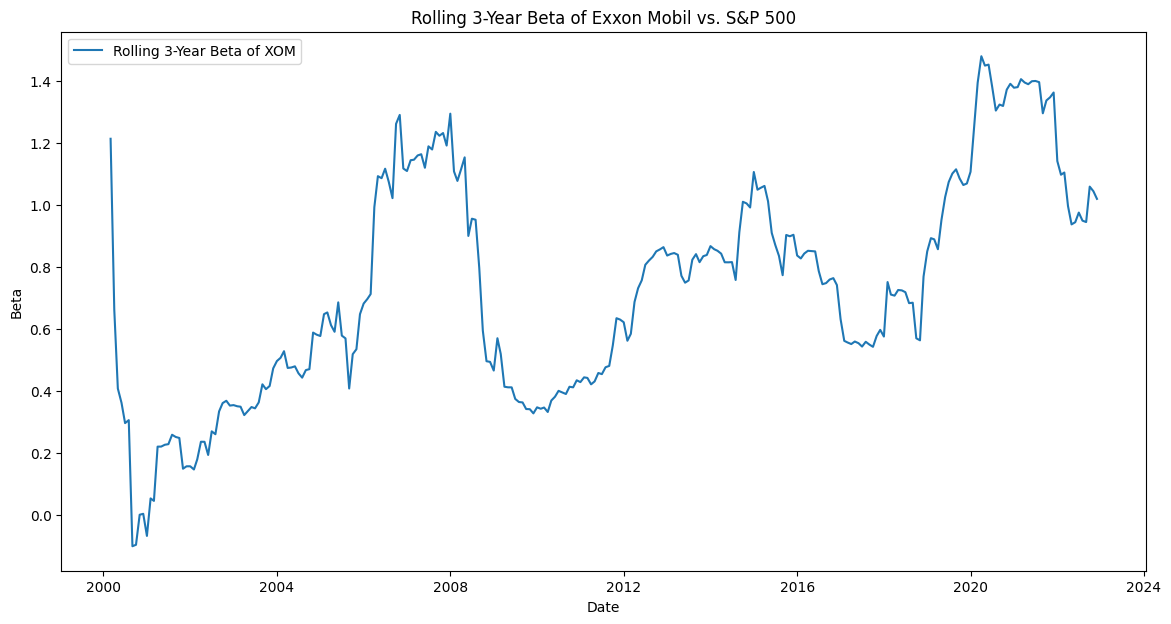

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(beta_rolling['Beta 3-Year Rolling'], label='Rolling 3-Year Beta of XOM')
plt.title('Rolling 3-Year Beta of Exxon Mobil vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.legend()
plt.show()

The stock's beta, a measure of its volatility relative to the market, undergoes fluctuations influenced by a myriad of factors. Market conditions and industry dynamics play pivotal roles in shaping a stock's movement concerning the overall market trends. Illustrated in the graph spanning 24 years, fluctuations in beta are evident. The 2008 financial crisis notably heightened Exxon Mobil's sensitivity to market shifts. Stocks with lower betas generally entail reduced risk albeit yielding comparatively lower returns. The beta trajectory in the graph fluctuates between 1.2, drops to 0, and subsequently rises to 0.2, 0.4, and 0.6. Notably, this pattern generally demonstrates an incremental increase of 0.2. By 2010, betas typically range between 0.6 and 1.4. Conversely, high-beta stocks pose greater risk but offer the potential for higher returns. Each stock bears its distinct level of risk, with a beta below 1.0 indicating a stock moves less than the market. A beta greater than 1 signals heightened volatility relative to the market, often attributed to sector-specific risks. Conversely, a beta below 1 suggests reduced sensitivity to market fluctuations, primarily influenced by company-specific factors driving stock performance.

In [ ]:
tickers = ['WMT', 'AAPL', 'IBM', 'GE', 'TSLA', 'BAC']
weights = np.array([0.05, 0.10, 0.25, 0.05, 0.40, 0.15])

In [ ]:
# Specify the time frame for our stock data analysis
analysis_start_date = '2019-12-31'
analysis_end_date = '2022-12-31'

In [ ]:
data = yf.download(tickers + ['^GSPC'], start=analysis_start_date, end=analysis_end_date, interval='1mo')['Adj Close']

[*********************100%%**********************]  7 of 7 completed


In [ ]:
monthly_returns = data.pct_change().dropna()

In [ ]:
individual_betas = pd.Series(index=tickers)

<ipython-input-50-96d47deb5c2c>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  individual_betas = pd.Series(index=tickers)


In [ ]:
for ticker in tickers:
    covariance = monthly_returns[ticker].cov(monthly_returns['^GSPC'])
    variance = monthly_returns['^GSPC'].var()
    individual_betas[ticker] = covariance / variance

In [ ]:
portfolio_beta = np.sum(weights * individual_betas)

In [ ]:
expected_portfolio_movement = portfolio_beta * 1.5

In [ ]:
print("Individual betas:", individual_betas)
print("Portfolio beta:", portfolio_beta)
print("Expected portfolio movement if the S&P 500 goes up 1.5%:", expected_portfolio_movement, "%")

Individual betas: WMT     0.532031
AAPL    1.258471
IBM     0.662249
GE      1.193142
TSLA    2.500758
BAC     1.366159
dtype: float64
Portfolio beta: 1.5828953795030676
Expected portfolio movement if the S&P 500 goes up 1.5%: 2.3743430692546013 %


Beta values offer insights into how individual stocks correlate with movements in the S&P 500. A beta of 1 indicates that a stock moves in line with the market; values above 1 signify greater volatility, while those below 1 suggest less volatility. With a portfolio beta of 1.58, it indicates higher volatility compared to the market, primarily influenced by a significant allocation to Tesla, which has a notably high beta of 2.5.

Assuming a 1.5% increase in the S&P 500, the portfolio is expected to rise approximately 2.37% in the same direction, given its beta of 1.58. This amplifies market fluctuations as the portfolio displays heightened sensitivity to market changes compared to the index itself.

If a portfolio perfectly mirrors the S&P 500, its movements would precisely mimic those of the index. Therefore, a 1% fluctuation in the S&P 500 would correspond to a 1% adjustment in the portfolio. The portfolio's performance would mirror the index since the beta equals 1.

In [ ]:
data = yf.download(['XOM', 'SPY', 'BIL'], start='2007-01-01', end='2023-01-01', interval='1mo')['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [ ]:
monthly_returns = data.pct_change().dropna()

In [ ]:
risk_free_rate = monthly_returns['BIL']

In [ ]:
market_premium = monthly_returns['SPY'] - risk_free_rate

In [ ]:
xom_beta = 0.67

In [ ]:
expected_return = risk_free_rate + xom_beta * market_premium

In [ ]:
comparison = pd.DataFrame({
    'Expected Return': expected_return,
    'Actual Return': monthly_returns['XOM']
})

In [ ]:
comparison.dropna(inplace=True)

In [ ]:
print(comparison)

            Expected Return  Actual Return
Date                                      
2007-07-01        -0.018324       0.014902
2007-08-01         0.010133       0.007049
2007-09-01         0.023338       0.083985
2007-10-01         0.013731      -0.006158
2007-11-01        -0.024580      -0.030765
...                     ...            ...
2022-08-01        -0.026857      -0.013825
2022-09-01        -0.063896      -0.077745
2022-10-01         0.057896       0.269156
2022-11-01         0.038094       0.004783
2022-12-01        -0.041467      -0.001366

[186 rows x 2 columns]


The CAPM model assumes a linear relationship between risk and return but overlooks various risks and unexpected market changes. Actual returns are influenced by factors such as liquidity, company-specific news, and macroeconomic developments, which CAPM doesn't consider.

Using a fixed beta from a different period in Part 1 might not accurately show XOM's market risk since 2007 for CAPM predictions. Beta values can change due to shifts in market dynamics and changes in the company's operations and risk profile.

Improving the accuracy of CAPM estimates involves using a rolling beta calculated from a 36-month historical period leading up to each monthly return projection. This method allows the beta to adjust and better represent recent market conditions and company-specific risks.

The stock's beta shows an upward trend in the middle of the five-quarter time series. It surged to 1.4 in 2008, then increased to 1.2 in 2014 and 1.6 in 2021. A rising beta indicates increased volatility in the stock. When the beta exceeds 1 at certain points, Exxon Mobil's stock displays greater volatility compared to the market. Conversely, when the beta drops below 1, it indicates reduced sensitivity to market fluctuations.

In [ ]:
# Define the tickers for Exxon Mobil, S&P 500 index, and BIL
tickers = ['XOM', '^GSPC', 'BIL']

# Download historical data for the stocks
data = yf.download(tickers, start='2004-01-01', end='2023-01-01', interval='1mo')['Adj Close']

# Calculate monthly returns and drop the first row with NaN
monthly_returns = data.pct_change().dropna()

# Calculate rolling covariance with the market (S&P 500), rolling variance of the market, and rolling beta
lookback_period = 36  # months for rolling window
rolling_covariance = monthly_returns['XOM'].rolling(window=lookback_period).cov(monthly_returns['^GSPC'])
rolling_variance = monthly_returns['^GSPC'].rolling(window=lookback_period).var()
rolling_beta = rolling_covariance / rolling_variance

# Risk-free rate is the monthly return on BIL, this could be annualized as needed
risk_free_rate = monthly_returns['BIL']

# The risk premium is the difference between market returns and the risk-free rate
market_premium = monthly_returns['^GSPC'] - risk_free_rate

# Offset the beta by one month to use only past information for the forecast
rolling_beta_offset = rolling_beta.shift(1)

# Calculate CAPM estimated return for XOM using the offset rolling beta
capm_estimated_returns = risk_free_rate + rolling_beta_offset * market_premium

# Prepare the dataframe for comparison with actual returns, aligning the dates
comparison_df = pd.DataFrame({
    'CAPM Estimated Return': capm_estimated_returns,
    'Actual Return': monthly_returns['XOM']
}).dropna()

# The results for the comparison can now be displayed or analyzed
print(comparison_df.head())

[*********************100%%**********************]  3 of 3 completed

            CAPM Estimated Return  Actual Return
Date                                            
2010-07-01               0.026154       0.045733
2010-08-01              -0.019166      -0.009551
2010-09-01               0.034910       0.052819
2010-10-01               0.014557       0.076064
2010-11-01              -0.000945       0.046173
